In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
# Load the dataset
df = pd.read_csv("hospital_financials.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate total expenses
expenses_columns = ['Operating_Expenses', 'Staff_Costs', 'Medical_Supplies', 'Equipment_Costs']
df['Total_Expenses'] = df[expenses_columns].sum(axis=1)

# Calculate Expense-to-Revenue Ratio
df['Expense_to_Revenue'] = df['Total_Expenses'] / df['Total_Revenue']

# Identify hospitals with high expenses
high_expense_hospitals = df.groupby('Hospital_ID')['Expense_to_Revenue'].mean().sort_values(ascending=False)

df

,Hospital_ID,Date,Total_Revenue,Claims_Paid,Claims_Denied,Operating_Expenses,Staff_Costs,Medical_Supplies,Equipment_Costs,Net_Profit,Total_Expenses,Expense_to_Revenue
0,1,2023-01-31,521958,453832,35672,326820,106265,56850,49910,-17887,539845,1.034269
1,1,2023-02-28,568266,465345,47376,310263,116023,48322,21685,71973,496293,0.873346
2,1,2023-03-31,464820,416240,61934,317969,105311,45051,26420,-29931,494751,1.064393
3,1,2023-04-30,584779,492236,29652,343016,141434,65658,38942,-4271,589050,1.007304
4,1,2023-05-31,522537,395560,77009,309150,100189,59118,23005,31075,491462,0.940531
...,...,...,...,...,...,...,...,...,...,...,...,...
175,15,2023-08-31,501358,430226,65443,337127,131821,49503,47767,-64860,566218,1.129369
176,15,2023-09-30,513453,449031,46066,336925,147838,40822,37327,-49459,562912,1.096326
177,15,2023-10-31,447057,336164,26175,252198,120079,43452,29106,2222,444835,0.995030
178,15,2023-11-30,544931,461250,65606,292880,123236,62419,39978,26418,518513,0.951520


In [60]:
# Generate colors from red (high expense) to blue (low expense)
colors = sns.color_palette("YlOrBr_r", len(high_expense_hospitals))

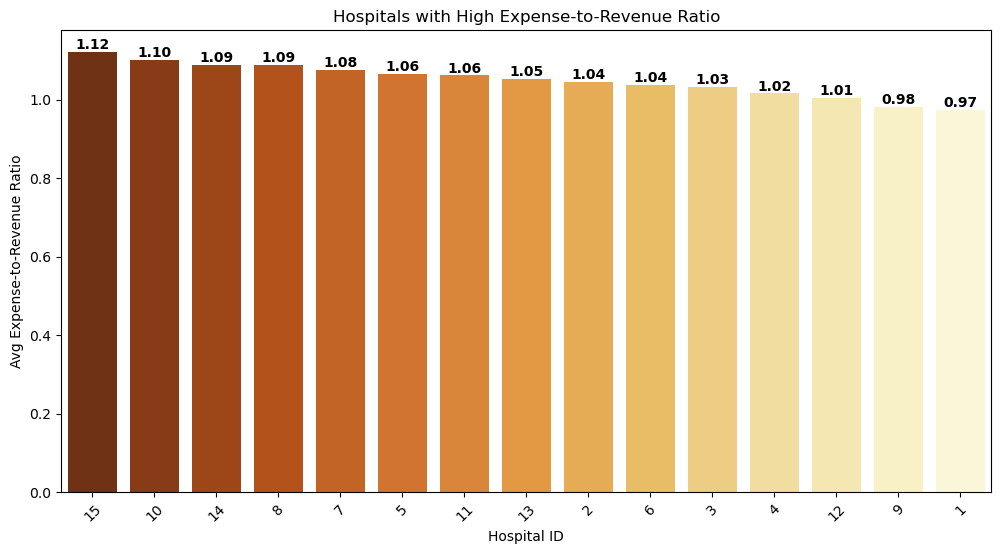

In [62]:
# Plot Expense-to-Revenue Ratio
plt.figure(figsize=(12,6))
ax = sns.barplot(x=high_expense_hospitals.index, y=high_expense_hospitals.values, palette=colors, order=high_expense_hospitals.index)
plt.xlabel("Hospital ID")
plt.ylabel("Avg Expense-to-Revenue Ratio")
plt.title("Hospitals with High Expense-to-Revenue Ratio")
plt.xticks(rotation=45)

# Add value labels above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()


In [6]:
# Revenue Trends Analysis
df_grouped = df.groupby('Date').sum()

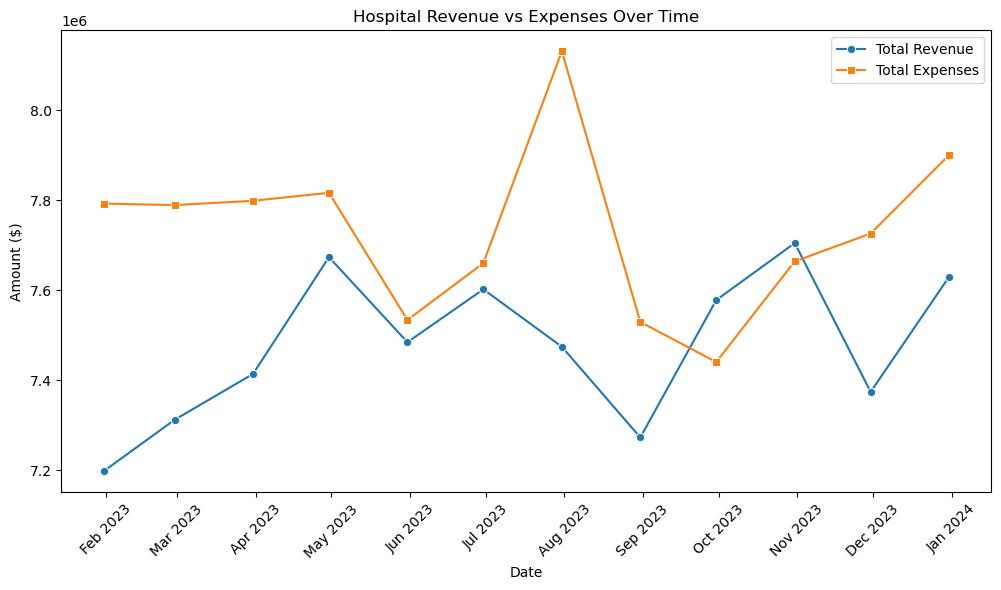

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_grouped.index, y=df_grouped['Total_Revenue'], marker='o', label="Total Revenue")
sns.lineplot(x=df_grouped.index, y=df_grouped['Total_Expenses'], marker='s', label="Total Expenses")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.title("Hospital Revenue vs Expenses Over Time")
plt.legend()
plt.xticks(rotation=45)

# Format x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.show()
